In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import sqlite3
import seaborn as sns
import json

In [2]:
sns.set(style='white', palette="Set2", color_codes=False)
sns.set_style("ticks")

%matplotlib inline

In [3]:
db = sqlite3.connect('monitoring.db')
df = pd.read_sql_query('select task_label, task_elapsed_time from task', db)

In [4]:
df = df.dropna()

In [5]:
df['caller'] = df['task_label'].str[37:].str.strip()

In [6]:
df['patient'] = df['task_label'].str[:36].str.strip()

In [7]:
with open('sizes.json') as f:
    sizes = json.load(f)

In [8]:
df['size_KB'] = df['patient']
df['time_min'] = df['task_elapsed_time'] / 60.

In [9]:
for patient in sizes:
    df['size_KB'][df['patient'] == patient] = int(sizes[patient]['normal'] + sizes[patient]['tumor'])
    #df['size_KB'][df['patient'] == patient] = int(sizes[patient]['tumor'])

/Users/awoodard/software/miniconda3/envs/parsl/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
df['size_GB'] = df['size_KB'] / 1e9

In [11]:
df.head()

,task_label,task_elapsed_time,caller,patient,size_KB,time_min,size_GB
0,0246823f-99f4-4a46-b2b1-27f81179584c-somaticsn...,1682.901423,somaticsniper,0246823f-99f4-4a46-b2b1-27f81179584c,38256217025,28.048357,38.2562
1,0246823f-99f4-4a46-b2b1-27f81179584c-muse,12551.461873,muse,0246823f-99f4-4a46-b2b1-27f81179584c,38256217025,209.191031,38.2562
2,0246823f-99f4-4a46-b2b1-27f81179584c-varscan,1536.712190,varscan,0246823f-99f4-4a46-b2b1-27f81179584c,38256217025,25.611870,38.2562
3,05ce16d4-a999-491a-91ad-9449a57228ff-somaticsn...,1003.157510,somaticsniper,05ce16d4-a999-491a-91ad-9449a57228ff,26198662670,16.719292,26.1987
4,05ce16d4-a999-491a-91ad-9449a57228ff-muse,8595.077900,muse,05ce16d4-a999-491a-91ad-9449a57228ff,26198662670,143.251298,26.1987


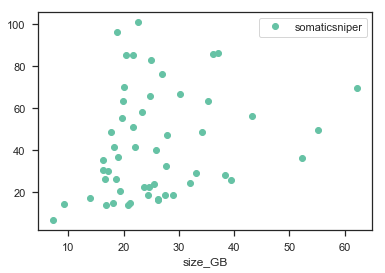

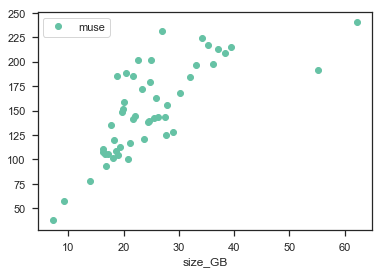

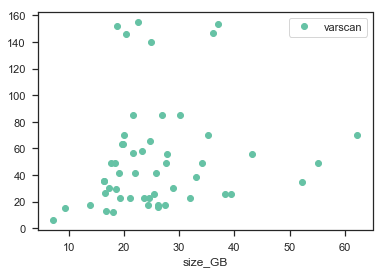

In [14]:
for caller in df.caller.unique():
    # print(df[df['caller'] == caller][['size_GB', 'time_min']])
    df[df['caller'] == caller].plot('size_GB', 'time_min', marker='o', linestyle='none', label=caller)

In [13]:
len(df[df['caller'] == 'muse'])

50